In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
dataset_train = pd.read_csv('d:/jupyter/datasets/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import CuDNNLSTM
from keras.layers import Dropout


In [7]:
regressor = Sequential([

    CuDNNLSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),

    CuDNNLSTM(units=50, return_sequences=True),
    Dropout(0.2),

    CuDNNLSTM(units=50, return_sequences=True),
    Dropout(0.2),

    CuDNNLSTM(units=50),
    Dropout(0.2),

    Dense(units=1)

])


In [8]:
regressor.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy']
)

In [9]:
regressor.fit(X_train, y_train, batch_size=32, epochs=100, verbose=2)

Epoch 1/100
38/38 - 7s - loss: 0.0437 - 7s/epoch - 189ms/step
Epoch 2/100
38/38 - 1s - loss: 0.0061 - 810ms/epoch - 21ms/step
Epoch 3/100
38/38 - 1s - loss: 0.0055 - 796ms/epoch - 21ms/step
Epoch 4/100
38/38 - 1s - loss: 0.0051 - 845ms/epoch - 22ms/step
Epoch 5/100
38/38 - 1s - loss: 0.0055 - 794ms/epoch - 21ms/step
Epoch 6/100
38/38 - 1s - loss: 0.0045 - 787ms/epoch - 21ms/step
Epoch 7/100
38/38 - 1s - loss: 0.0044 - 820ms/epoch - 22ms/step
Epoch 8/100
38/38 - 1s - loss: 0.0053 - 843ms/epoch - 22ms/step
Epoch 9/100
38/38 - 1s - loss: 0.0043 - 846ms/epoch - 22ms/step
Epoch 10/100
38/38 - 1s - loss: 0.0043 - 898ms/epoch - 24ms/step
Epoch 11/100
38/38 - 1s - loss: 0.0046 - 1s/epoch - 35ms/step
Epoch 12/100
38/38 - 1s - loss: 0.0044 - 1s/epoch - 39ms/step
Epoch 13/100
38/38 - 1s - loss: 0.0042 - 1s/epoch - 30ms/step
Epoch 14/100
38/38 - 1s - loss: 0.0037 - 759ms/epoch - 20ms/step
Epoch 15/100
38/38 - 1s - loss: 0.0044 - 770ms/epoch - 20ms/step
Epoch 16/100
38/38 - 1s - loss: 0.0040 - 748m

In [10]:
dataset_test = pd.read_csv('d:/jupyter/datasets/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [11]:
dataset_total = pd.concat(
    (dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


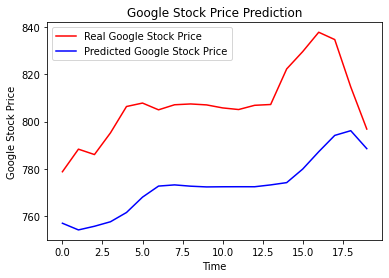

In [12]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()